In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(), # 3*224 * 224 96 * 11 * 11 (224 - 11 + 1 * 2) / 4 + 1 = 24
    nn.MaxPool2d(kernel_size=3, stride=2), # 54 + 2 - 3 / 2 26
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(), # (26 + 2*2 - 5 + 1) = 26
    nn.MaxPool2d(kernel_size=3, stride=2), # (26 - 3 + 2) / 2 = 12
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(), # (12 - 3 + 1 * 2 + 1) 12
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(), # 12 - 3 + 1*2  + 1 = 12
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(), # 12
    nn.MaxPool2d(kernel_size=3, stride=2), # 12 - 3  / 2 + 1 5
    nn.Flatten(), # 25 * 256
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.Linear(4096, 10))


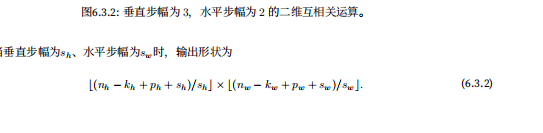


根据卷积层运算的公式：<br/>
输出高度 = (输入高度 + 2 * 填充 - 卷积核高度) / 步幅 + 1<br/>
输出宽度 = (输入宽度 + 2 * 填充 - 卷积核宽度) / 步幅 + 1

In [3]:
X = torch.rand(size=(1, 1, 224, 224), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [4]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


training on cpu


RuntimeError: [enforce fail at alloc_cpu.cpp:75] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 88604672 bytes. Error code 12 (Cannot allocate memory)

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


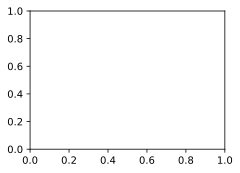

In [5]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
d2l.load_data_fashion_mnist??

In [ ]:
!ping localhost:8889